<h1>Analysis 1 - Binary Classification of Advertising Dataset using Logistic Regression</h1>

<p> The goal is to predict when users clicked on the Ad or not. Download the dataset from <a href="https://www.kaggle.com/fayomi/advertising">link</a></p>
<h3>Import all necessary packages</h3>

In [524]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from planar_utils import plot_decision_boundary
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics
from sklearn.metrics import precision_recall_curve

%matplotlib inline

<h3>Read the advertising dataset</h3>
<p>Read the dataset as a csv file and explore the data columns using the info() function. We see that there no not-null records and features Ad Topic Line , City, Timestamp and Country are of Object datatype</p>

In [525]:
df = pd.read_csv('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/advertising.csv',header=0)
print(df.shape)
df.info()

(1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<h3>Get the Descriptive statistics using datafrmae.describe() function</h3>

In [526]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<h3>Distribution of classes - The classes are balanced as number of positive classes = number of negative classes </h3>

In [527]:
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

<h4> The below code chunk does the following </h4>
<ul><li>Get the features dataframe X by removing the last column from dataframe df using .iloc</li>
    <li>Get the labels dataset y by getting the last column from dataframe df using .iloc</li>
    <li>Replace y=0 with -1 in labels dataset y</li>
</ul>

In [528]:
X = df.iloc[:,:-1] # remove the last column from df(retain all other cols)
y = df.iloc[:,-1] # have only the last column - all rows and the last column
y = np.where(y == 0, -1, y) # replace 0 by -1 or y = y*2 - 1

<h3>Convert categorical variables into indicator variables in order to fit ML models</h3>

In [529]:
X = pd.get_dummies(X, drop_first=True)

<h3>Divide the data into training, hold out and test sets </h3>

In [530]:
# Divide the data into training, validation and test sets in the ration 60:20:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=7,stratify=y,shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=1,test_size=0.5,stratify=y_test,shuffle=True)

<h3>Standardize the data</h3>

In [531]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
X_val = scaler.transform(X_val) 

<h3>Write a function to get the Objective function or the cost</h3> 

In [532]:
import numpy as np
def obj(X,y,betas,lamda):
    a = y*(X.dot(betas))
    n=len(y)
    #return (1/n)*np.logaddexp(0,-a) + lamda*np.linalg.norm(betas)**2
    return (1/n)*(np.sum(np.log(1 + np.exp(-a)))) + lamda*np.linalg.norm(betas)**2

<h3>Fit LogisticRegression  model on training set and get the parameters such that cost is minimum</h3>

In [533]:
n,d=X_train.shape
X = X_train
y = y_train
lamda = 0.5
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
# lamda = 1/(2*C*n)
clf_lr = LogisticRegression(penalty='l2', tol=10e-8,dual=False, C=1/(2*lamda*n), 
                           fit_intercept=False,random_state = 0,max_iter=1000)
clf_lr.fit(X_train, y_train) 
betas = np.squeeze(clf_lr.coef_) # since the o/p is a 2d array, getting the first element out of it using [0]

print("Logistic Regression coefficients using sklearn package: β \n",betas)
print()
print("Objective function for Ridge coefficients using sklearn package: β \n",obj(X_train,y_train,betas,lamda))

Logistic Regression coefficients using sklearn package: β 
 [-0.17524167  0.1118577  -0.09704767 ...  0.00908328  0.01038997
  0.        ]

Objective function for Ridge coefficients using sklearn package: β 
 0.40893271869214665



<h3> Hyperparameter tuning: Run cross-validation on the validation set  using scikit-learn to ﬁnd the optimal value of λ. </h3>


In [534]:
n,d=X_val.shape
# same as lr except including C
lr_cv = LogisticRegressionCV(penalty='l2', tol=10e-8,
                             fit_intercept=False,random_state=0,max_iter=1000)
lr_cv.fit(X_val, y_val)

print("[INFO] Accuracy:", lr_cv.score(X_val, y_val))
optimal_lambda = 1/(2*lr_cv.C_[0]*len(X_val))
optimal_C = lr_cv.C_[0]
print('Optimal C=', lr_cv.C_[0])
print('Optimal lambda=', optimal_lambda)

[INFO] Accuracy: 1.0
Optimal C= 1291.5496650148827
Optimal lambda= 1.9356592067028192e-06


<h3> Fit logistic regression model on training set to optimize the objective with that value of λ.</h3>

In [535]:
n,d=X_train.shape
X = X_train
y = y_train
lamda = optimal_lambda
C = optimal_C

clf_lr = LogisticRegression(penalty='l2', tol=10e-8, C=C, 
                           fit_intercept=False,max_iter=10000)
clf_lr.fit(X_train, y_train) 
betas = np.squeeze(clf_lr.coef_)

print("Logistic Regression coefficients using sklearn package: β \n",betas)
print()
print("Objective function for Ridge coefficients using sklearn package: β \n",obj(X_train,y_train,betas,lamda))


Logistic Regression coefficients using sklearn package: β 
 [-1.84972166  1.13042894 -0.97107465 ...  0.08925567  0.12673017
  0.        ]

Objective function for Ridge coefficients using sklearn package: β 
 6.721675787400559e-05



When lamda =1.9356592067028192e-06, the objective function reduces from 0.4089 to 6e-5

<h3>Find the misclassiﬁcation error on training, validation and test datasets</h3>


In [536]:
def misclass_error(betas,X,y):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
   
    y_pred = np.sign(X.dot(betas))
    error=np.mean(y_pred*y == -1)

    return error

In [537]:
print("Training misclassification error : ",misclass_error(betas,X_train,y_train))
print("Validation misclassification error : ",misclass_error(betas,X_val,y_val))
print("Test misclassification error : ",misclass_error(betas,X_test,y_test))
print("Test data accuracy :" ,clf_lr.score(X_test, y_test))

Training misclassification error :  0.0
Validation misclassification error :  0.065
Test misclassification error :  0.08
Test data accuracy : 0.92


<h3>Find precision, recall, specificity and sensitivity. </h3>

In [538]:
yhat_test = clf_lr.predict(X_test)

In [539]:
# Precision = TP/(TP + FP)
precision = sum((yhat_test == 1) & (y_test == 1))/sum(yhat_test == 1)

# Recall = TP/(TP + FN)
recall = sum((yhat_test == 1) & (y_test == 1))/sum(y_test == 1)

print('Precision=', precision)
print('Recall=', recall)

Precision= 0.9117647058823529
Recall= 0.93


In [540]:
precision_sklearn = sklearn.metrics.precision_score(y_test, yhat_test)
print('Precision according to sklearn = %0.2f' % precision_sklearn)
recall_sklearn = sklearn.metrics.recall_score(y_test, yhat_test)
print('Recall according to sklearn = %0.2f' % recall_sklearn)

Precision according to sklearn = 0.91
Recall according to sklearn = 0.93


<p>Of the people we labeled as having 'Clicked on Ad', 91% of them did in fact Click on Ad. Out of all of the people that truely 'Clicked on Ad', we labeled 93% of them as having 'Clicked on Ad'. </p>

<h3>Precision Recall curve</h3>
<p>Logistic regression classifiers output a continuous value, and we convert that to $\pm$ 1 (or 1/0) by applying a threshold. Depending on how you set the threshold, you'll get different precision and recall values. In some applications it's very important to have either high precision or high recall. A classic statistical example of this is when trying to assess whether or not people are guilty of a crime. It's terrible to convict an innocent person of a crime, so we would want to have very few (hopefully zero) false positives and aim for very high precision.</p>

<p>We can plot a curve of precision and recall values as we change the threshold for what we
use to assign to the 'Clicked on Ad' class vs. the 'non-Clicked on Ad' class.</p>

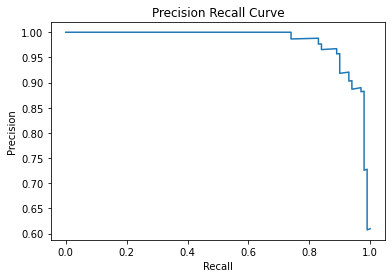

In [541]:
# Generate estimated values for test observations using the logistic regression classifier
test_probs = clf_lr.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, test_probs[:, 1])

plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/precision_recall_curve.jpg');
plt.show()

<h3>ROC Curve</h3>
Another common way to summarize the results is via a receiver operating characteristic (ROC) curve. An ROC curve plots the true positive rate vs. the false positive rate as the threshold is varied. Here we have
$$ \text{True positive rate} = \text{Recall} = \frac{\text{# True positives}}{\text{# True positives + # False negatives}} $$
and
$$ \text{False positive rate} = \frac{\text{# False positives}}{\text{# False positives + # True negatives}}. $$

If we are concerned about how model performs on both the positive and negative classes, AUC is better. But if the classes are skewed, then precision recall would be better.

Logistic: ROC AUC=0.979


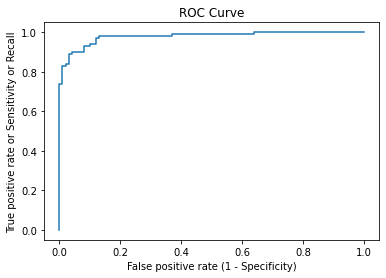

In [542]:
# We can plot a curve of precision and recall values as we change the threshold for what we
# use to assign an image to the toucan class vs. the non-toucan (hornbill) clas
test_probs = clf_lr.predict_proba(X_test)

# calculate and summarize scores
lr_test_auc_score = roc_auc_score(y_test, test_probs[:, 1])
print('Logistic: ROC AUC=%.3f' % (lr_test_auc_score))

# get fpr,tpr and threshold
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True positive rate or Sensitivity or Recall')
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/roc_curve.jpg');
plt.show()

<h3>Sensitivity and Specificity</h3>

$$ \text{Sensitivity} = \text{True positive rate} = \text{Recall} = \frac{\text{# True positives}}{\text{# True positives + # False negatives}} $$
and
$$ \text{Specificity} = \text{True negative rate} = \frac{\text{# True negatives}}{\text{# True negatives + # False positives}}. $$

In [543]:
#Specificity = 1 - FPR = True negative rate = TN/(TN + FP)
Specificity =  sum((yhat_test == -1) & (y_test == -1))/sum(y_test == -1)

#Recall = Sensitivity = TPR = TP/(TP + FN)
Sensitivity = sum((yhat_test == 1) & (y_test == 1))/sum(y_test == 1)

print('Specificity =', Specificity )
print('Sensitivity or Recall=', Sensitivity)

Specificity = 0.91
Sensitivity or Recall= 0.93


<h3> Confusion Matrix </h3>

In [544]:
confusion_matrix(y_test,yhat_test)

array([[91,  9],
       [ 7, 93]], dtype=int64)

<h3>Plot the decision boundary for logistic regression</h3>

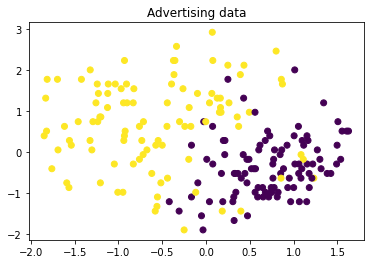

In [545]:
# Visualize the data:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Advertising data")
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/Ad_data.jpg');

In [546]:
X_set_test = X_test[:,:2]
y_set_test = y_test.reshape(200,1)

X_set_train = X_train[:,:2]
y_set_train = y_train.reshape(600,1)

In [547]:
clf_lr = LogisticRegression(penalty='l2', tol=10e-8, C=optimal_C, 
                           fit_intercept=False,max_iter=10000)
clf_lr.fit(X_set_train,y_set_train)
yhat_set_test = clf_lr.predict(X_set_test)

c:\users\lakshmi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


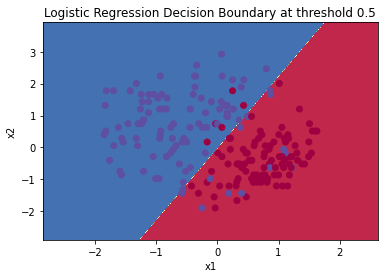

In [548]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf_lr.predict(x), X_set_test.T, y_set_test.T)
plt.title("Logistic Regression Decision Boundary at threshold 0.5")
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/logistic_reg_decision_boundary.jpg');

<h1>Analysis 2 - Binary Classification using Neural Networks</h1>

In [549]:
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

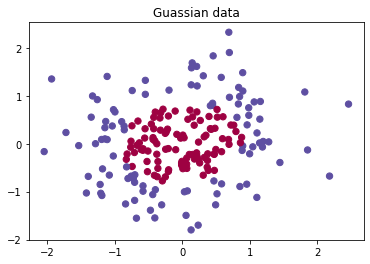

In [550]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "gaussian_quantiles"

X, y = datasets[dataset]
X, y = X.T, y.reshape(1, y.shape[0])

# make blobs binary
if dataset == "blobs":
    y = y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Guassian data")
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/guassian_data.jpg');

In [551]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T);

c:\users\lakshmi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 52 % (percentage of correctly labelled datapoints)


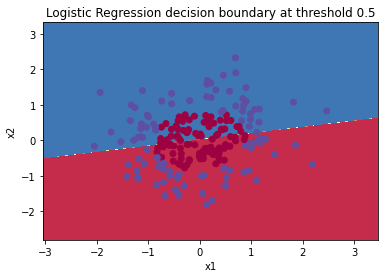

In [552]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression decision boundary at threshold 0.5")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/logistic_regression_decision_boundary.jpg');

<h3>Neural Network model (Andrew Ng lectures)</h3>

1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

In [553]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [554]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
      
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [555]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [556]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost 
    
    """   
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = -(1/m)*np.sum(logprobs)
     
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
   
    return cost

In [557]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".

    W1 = parameters["W1"]
    W2 = parameters["W2"]
         
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [558]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [559]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
                 
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [560]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

Cost after iteration 0: 0.693158
Cost after iteration 1000: 0.097144
Cost after iteration 2000: 0.072379
Cost after iteration 3000: 0.068744
Cost after iteration 4000: 0.093343
Cost after iteration 5000: 0.063983
Cost after iteration 6000: 0.067524
Cost after iteration 7000: 0.063953
Cost after iteration 8000: 0.059394
Cost after iteration 9000: 0.133290
W1 = [[-1.68341822 -3.1537698 ]
 [-4.09285375 -0.04461675]
 [ 0.10803919  0.03546445]
 [-2.09893581  3.49456641]]
b1 = [[ 2.13304494]
 [-2.49847059]
 [ 2.73193317]
 [ 1.5213026 ]]
W2 = [[-14.97412046  14.85793661   7.84944116 -13.7710154 ]]
b2 = [[10.33550296]]


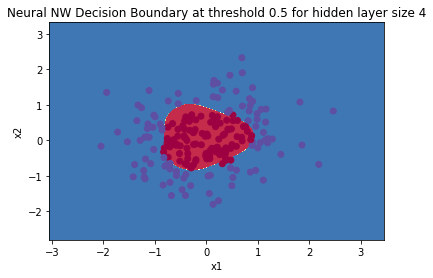

In [563]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Neural NW Decision Boundary at threshold 0.5 for hidden layer size " + str(4))
plt.savefig('C:/Users/Lakshmi/Desktop/UW DataScience application/558 ML/Week 3/neural_nw_decision_boundary.jpg');

In [562]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%
